# Assignment 6 : Logistic regression - Bank data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("bank-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
print(df.apply(lambda col: col.unique()))

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                            [married, single, divorced]
education              [tertiary, secondary, unknown, primary]
default                                              [no, yes]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                              [yes, no]
loan                                                 [no, yes]
contact                         [unknown, cellular, telephone]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month        [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                    [unknown, failure, other, s

In [9]:
cols=[0,5,11,13,14,16]
df1=df[df.columns[cols]]

In [10]:
df1.head()

,age,balance,duration,pdays,previous,y
0,58,2143,261,-1,0,no
1,44,29,151,-1,0,no
2,33,2,76,-1,0,no
3,47,1506,92,-1,0,no
4,33,1,198,-1,0,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df1['y'].replace(['yes', 'no'],
                        [1, 0], inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_8248\242438646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'].replace(['yes', 'no'],


In [13]:
df1

,age,balance,duration,pdays,previous,y
0,58,2143,261,-1,0,0
1,44,29,151,-1,0,0
2,33,2,76,-1,0,0
3,47,1506,92,-1,0,0
4,33,1,198,-1,0,0
...,...,...,...,...,...,...
45206,51,825,977,-1,0,1
45207,71,1729,456,-1,0,1
45208,72,5715,1127,184,3,1
45209,57,668,508,-1,0,0


In [14]:
cols=list(df1)[0:-1]

In [16]:
cols

['age', 'balance', 'duration', 'pdays', 'previous']

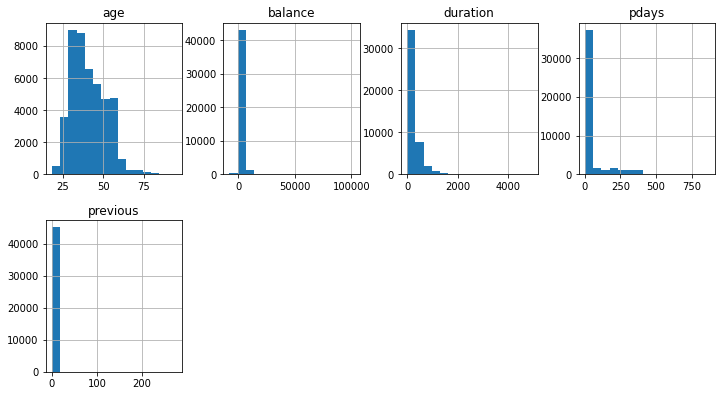

In [17]:
df[cols].hist(bins=15,figsize=(12,50),layout=(14,4))
plt.show()

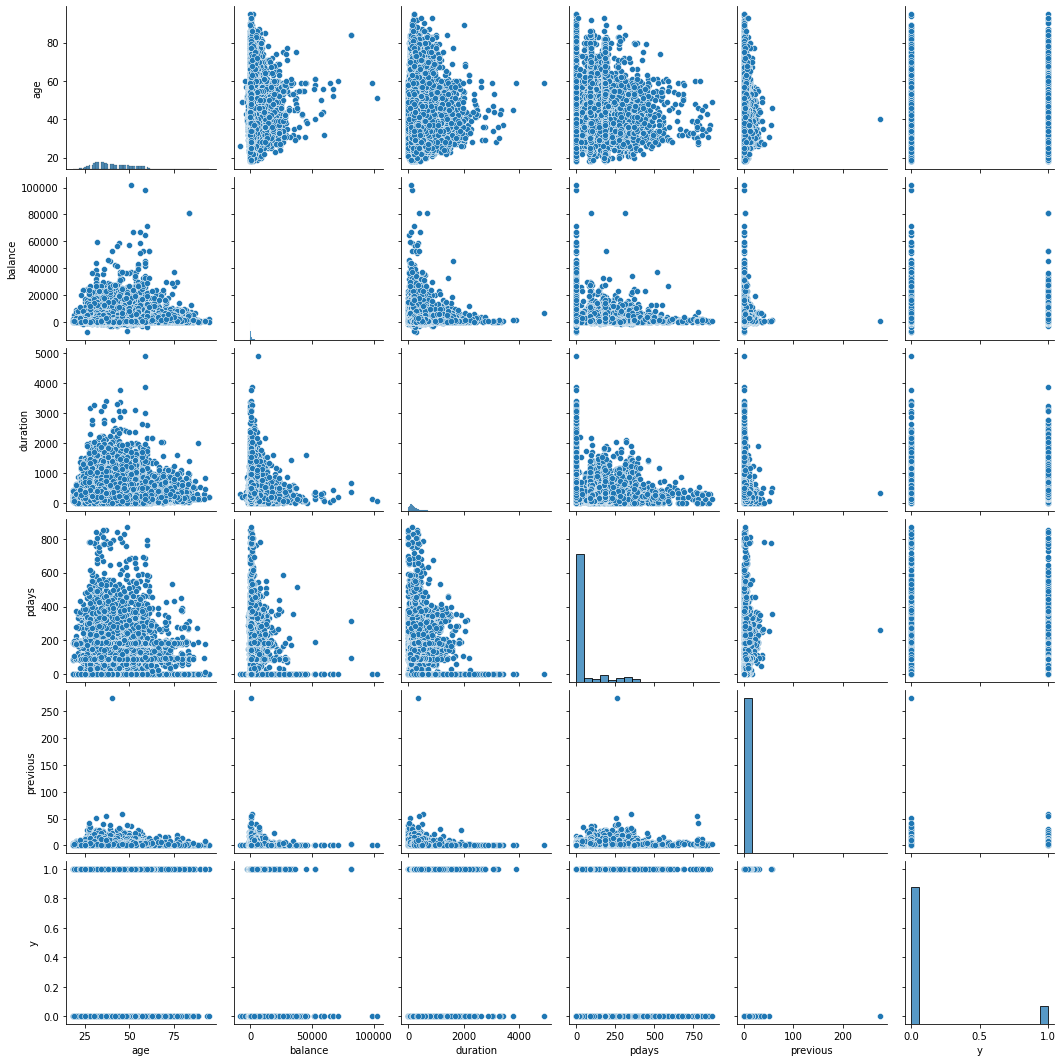

In [18]:
sns.pairplot(df1)

In [19]:
corr_df=df1.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

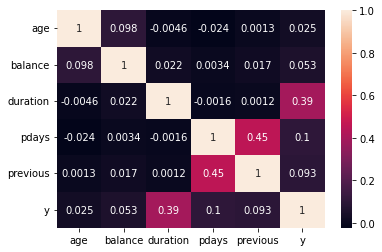

In [20]:
sns.heatmap(corr_df,annot=True)
plt.show

<AxesSubplot:ylabel='previous'>

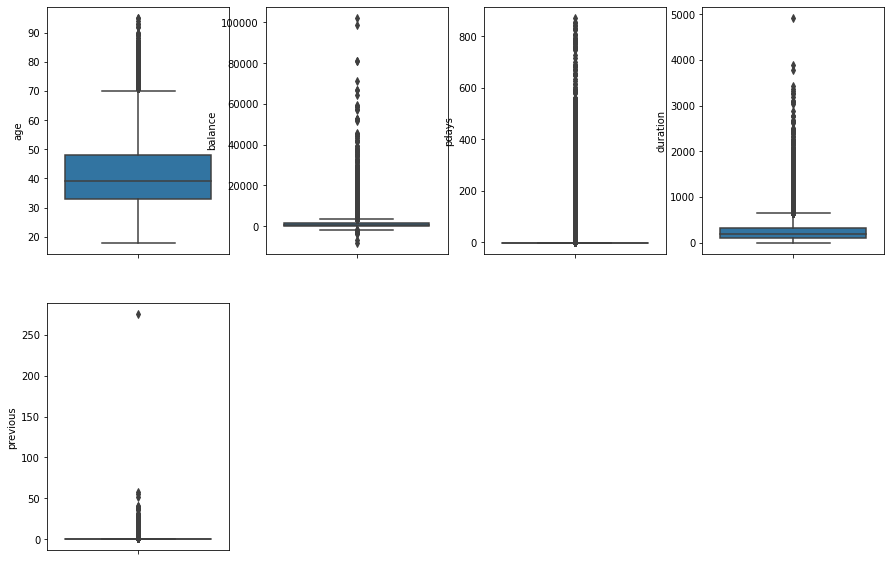

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=df1)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=df1)
plt.subplot(2,4,3)
sns.boxplot(y='pdays',data=df1)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=df1)
plt.subplot(2,4,5)
sns.boxplot(y='previous',data=df1)

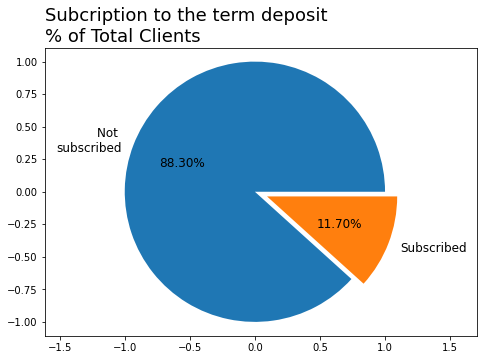

In [22]:
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1) 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.pie(df1['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 
ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')
plt.show()

# Target and Feature

In [23]:
X= df1.drop('y',axis=1).values
y=df1.iloc[:,-1]

# Standerdization if required

In [24]:
df1.describe()

,age,balance,duration,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,40.197828,0.580323,0.116985
std,10.618762,3044.765829,257.527812,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,0.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,319.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,871.000000,275.000000,1.000000


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(X)

In [26]:
x

array([[ 1.60696496,  0.25641925,  0.0110161 , -0.41145311, -0.25194037],
       [ 0.28852927, -0.43789469, -0.41612696, -0.41145311, -0.25194037],
       [-0.74738448, -0.44676247, -0.70736086, -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688,  1.43618859,  1.05047333],
       [ 1.51279098, -0.22802402,  0.97014641, -0.41145311, -0.25194037],
       [-0.37068857,  0.52836436,  0.39932797,  1.4761376 ,  4.52357654]])

# Training and testing

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size= .75,random_state=0)

In [28]:
X_train.shape

(33908, 5)

# Logistic regression  model

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
y_test.values

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

# Model Validation

In [33]:
data = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
9953,0,0
37898,0,0
1080,0,0
17950,0,0


# Model visualization

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
cm=confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[9820,  158],
       [1107,  218]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.8880828098734849

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.58      0.16      0.26      1325

    accuracy                           0.89     11303
   macro avg       0.74      0.57      0.60     11303
weighted avg       0.86      0.89      0.86     11303

